# TP Decision Tree & Random Forest

## Imports

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree

## Dataset

- Load iris dataset
- Split in train/test

In [23]:
# load the dataset
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target

# split in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Decision Tree Classifier
Create the [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), train it, predict the results of the test set and score them.

Use the entropy criterion, as seen during the course. This is useful to maximize the information gain. You can specify other parameters such as the depth of the tree and others (read the doc).


In [24]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98

The function below will print what the tree computes when you give it a sample. Use it to understand what your tree really do.

In [25]:
def tree_to_code(this_tree, feature_names):
    from sklearn.tree import _tree
    tree = this_tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree.value[node]))

    recurse(0, 1)

In [30]:
tree_to_code(clf, iris_dataset.feature_names)

def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
  if petal length (cm) <= 2.449999988079071:
    return [[31.  0.  0.]]
  else:  # if petal length (cm) > 2.449999988079071
    if petal width (cm) <= 1.75:
      if petal length (cm) <= 5.349999904632568:
        if petal width (cm) <= 1.449999988079071:
          return [[ 0. 26.  0.]]
        else:  # if petal width (cm) > 1.449999988079071
          if sepal width (cm) <= 2.600000023841858:
            if sepal length (cm) <= 6.150000095367432:
              return [[0. 0. 2.]]
            else:  # if sepal length (cm) > 6.150000095367432
              return [[0. 1. 0.]]
          else:  # if sepal width (cm) > 2.600000023841858
            return [[0. 7. 0.]]
      else:  # if petal length (cm) > 5.349999904632568
        return [[0. 0. 2.]]
    else:  # if petal width (cm) > 1.75
      if petal length (cm) <= 4.8500001430511475:
        if sepal length (cm) <= 5.950000047683716:
          return 

If you want to understand the decision tree structure, you can read [this](http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html).

The classifier contains an attribute *tree_* that stores the entire tree built. The classifier gives some methods to exploit it. Call ".decision_path()" on the classifier with the test set as parameter. You'll have the paths for all the test samples.

*NB: to transform a csr_matrix to an array, just call ".toarray()".*

In [34]:
clf.decision_path(X_test)

<50x17 sparse matrix of type '<class 'numpy.int64'>'
	with 186 stored elements in Compressed Sparse Row format>

How many samples are contained in the test set ?

In [26]:
len(y_test)

50

How many nodes are there in the tree ?

In [27]:
clf.tree_.node_count

17

How many samples go through each node ?

array([100,  31,  69,  38,  36,  26,  10,   3,   2,   1,   7,   2,  31,
         3,   1,   2,  28], dtype=int64)

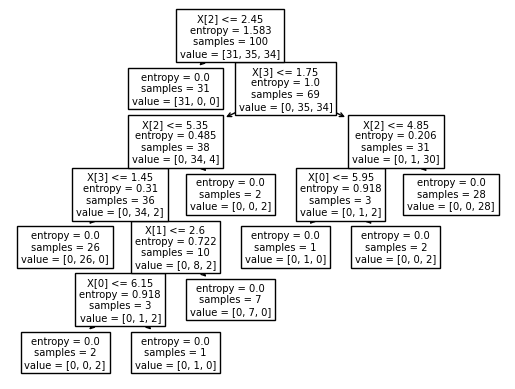

In [31]:
tree.plot_tree(clf)
clf.tree_.n_node_samples

### More resources

- [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)
- [Plot the decision surface of a decision tree on the iris dataset](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py)

--------------

## Random Forest classifier
Now create a random forest classifier and compare it with the decision tree.

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
eclf = RandomForestClassifier(criterion="entropy", n_estimators=5)
eclf.fit(X_train, y_train)
eclf.score(X_test, y_test)

0.98

Explain the parameters you chose to use. (answer with text in the following cell)

Criterion: J'ai pris le même que pour le decision tree afin d'être cohérent.
n_estimators: J'ai choisi un chiffre assez petit pour être rapide mais assez grand pour obtenir les mêmes résultats que le decision tree. De plus, j'ai tester avec un grand nombre (1000) et j'ai pas obtenu de meilleurs résultats.

What is the difference between the "RandomForestClassifier" and the "RandomForestRegressor" ?
(answer with text in the following cell)

La différence est dans le dernier mot. Classifier veut dire que les données sont labelisées tandis que la regression s'effectue sur des données continues.

### More resources

- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

-------------------
## Decision Tree VS Random Forest

To compare the two algorithms, we will train multiple times the two classifiers with only two features each time. This will permit us to plot it more easily and so what is going on.

You can find more info on what to do [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html). Compare only the two algorithmes seen here above. You can reuse a lot of code from this page.

Here is what you should get :

![comparison plots](http://asylamba.com/public/media/files/sources/randomforest-comp.png)

What can you say about these plots ? Why the plots from the Decision Tree contains plain red, blue and yellow when the ones from the Random Forest get shades of colors ? Explain.
(answer with text in the following cell)

L'algorithme d'arbre de décision contient qu'un seul arbre qui rend un label pour une entrée. En revanche, la random forest contient plusieurs arbres que peuvent de pas rendre le même label. Pour se décider, la random forest prend le label le plus prédit pour une donnée et plus une zone est nuancée plus elle a reçu des avis labels différents.

### Good work !
![forest](https://static.pexels.com/photos/26948/pexels-photo.jpg)